# Import and set up basic lattice

In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

In [3]:
tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = True,
    numMacroParticles=1e4,
)

setLattice(tao, **importedDefaultSettings)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0


# Track to checkpoint

To avoid having to retrack through the whole beamline each time if you'll only be moving a BC20 collimator, we can save a beam partway and reuse it

In [4]:
checkpointElement = "CB1LE" #Shortly downstream of BEGBC20; there's an intervening dipole though

trackBeam(tao, 
          trackStart = "L0AFEND", 
          trackEnd = checkpointElement,
          centerBC14 = importedDefaultSettings["centerBC14"], 
          centerBC20 = importedDefaultSettings["centerBC20"], 
          #centerMFFF = importedDefaultSettings["centerMFFF"], 
          assertBC14Energy = importedDefaultSettings["assertBC14Energy"], 
          assertBC20Energy = importedDefaultSettings["assertBC20Energy"],  
          verbose = True
         )

Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = CB1LE
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = CB1LE
Set track_end = BEGBC20
Tracking!
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = CB1LE
Tracking!
trackBeam() exiting


In [5]:
PInit = getBeamAtElement(tao, checkpointElement)
makeBeamActiveBeamFile(PInit)

# Track to end - without collimators

In [6]:
trackBeam(tao, 
          trackStart = checkpointElement, 
          trackEnd = "end",
          centerMFFF = importedDefaultSettings["centerMFFF"], 
          verbose = True
         )

Loaded activeBeamFile.h5
Set track_start = CB1LE, track_end = end
Set track_end = MFFF
Tracking!
Beam centered at MFFF written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = MFFF, track_end = end
Tracking!
trackBeam() exiting


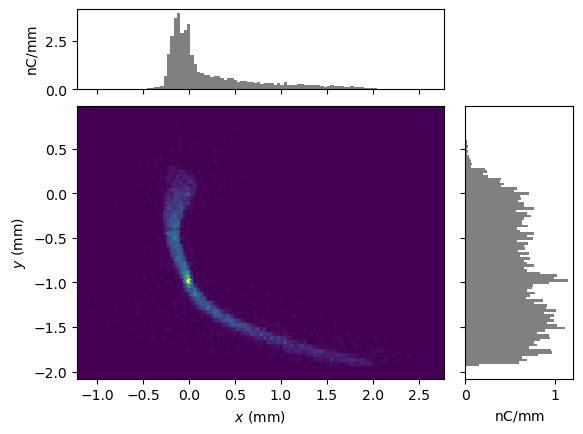

<Figure size 640x480 with 0 Axes>

In [7]:
P = getBeamAtElement(tao, "DTOTR")

display(plotMod(P, 'x', 'y',  bins=100))
plt.clf()

# Scan notch collimator while watching DTOTR

[-0.004, -0.003]
New particle count: 9998
9998
Notch position = -0.004


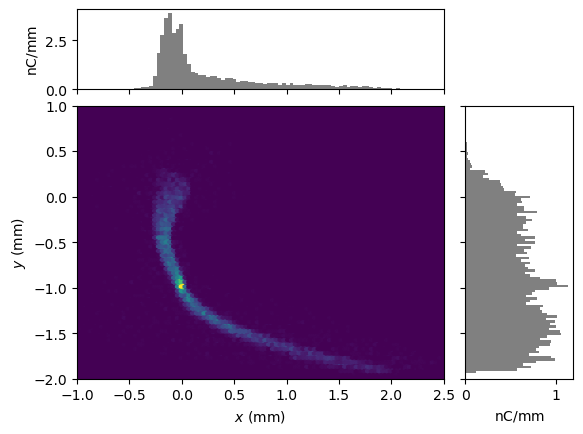

[-0.0035, -0.0025]
New particle count: 9135
9135
Notch position = -0.0035


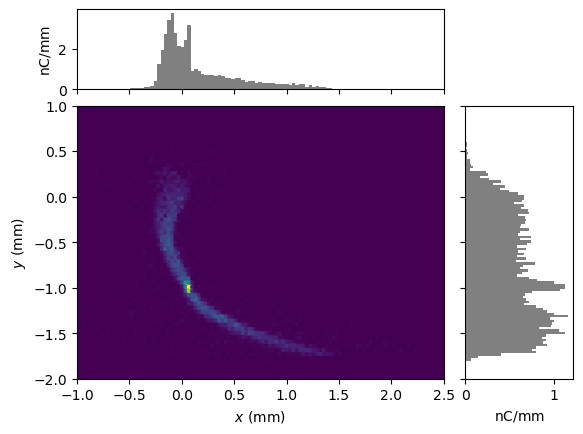

[-0.003, -0.002]
New particle count: 7330
7330
Notch position = -0.003


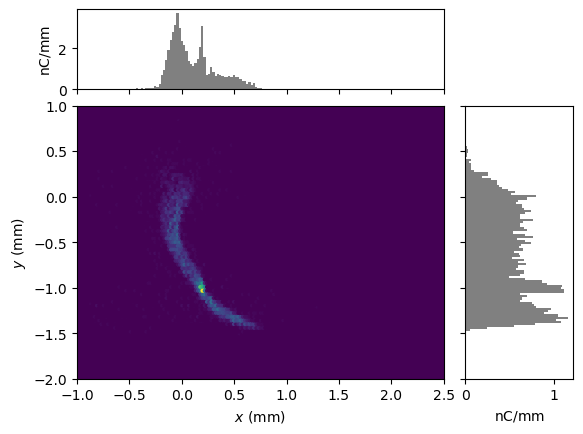

[-0.0025, -0.0015]
New particle count: 6418
6418
Notch position = -0.0025


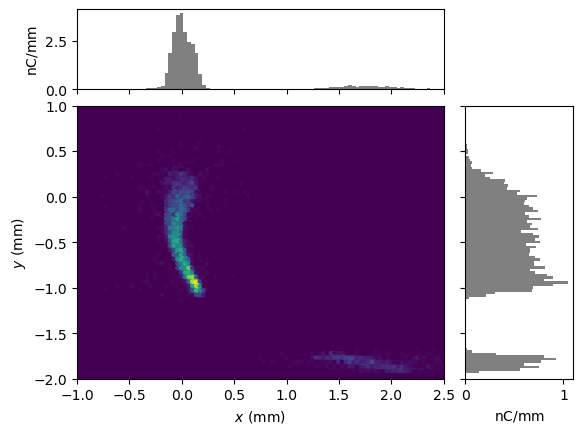

[-0.002, -0.001]
New particle count: 6541
6541
Notch position = -0.002


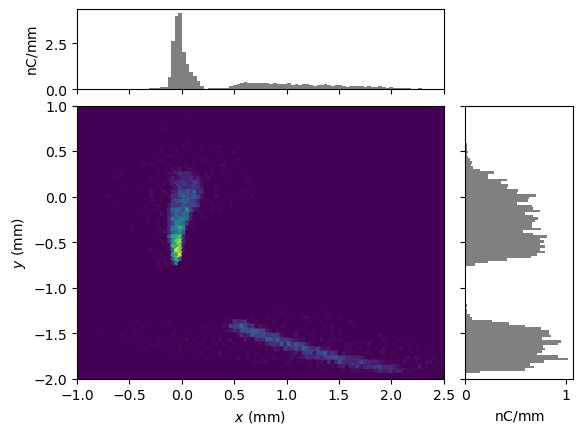

[-0.0015, -0.0005]
New particle count: 6850
6850
Notch position = -0.0015


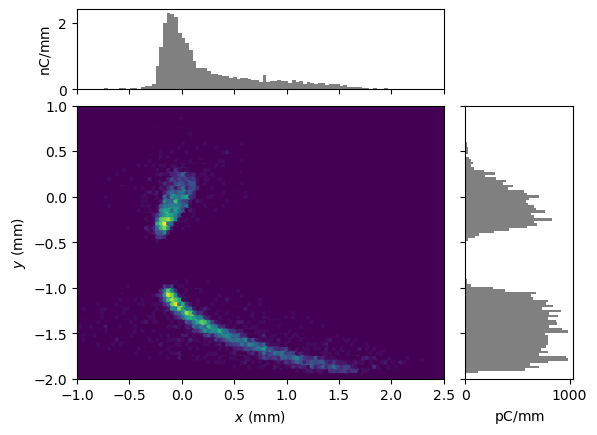

In [8]:
notchWidth = 1e-3

for notchX in np.arange( -0.004, -0.001, 0.0005 ) :
    trackBeam(tao, 
              trackStart = checkpointElement, 
              trackEnd = "end",
              centerMFFF = importedDefaultSettings["centerMFFF"], 
              allCollimatorRules = [[notchX, notchX  + notchWidth ]]
             )
    
    P = getBeamAtElement(tao, "DTOTR")

    print(f"Notch position = {notchX}")
    display(plotMod(P, 'x', 'y',  bins=100, xlim = [-1e-3, 2.5e-3], ylim = [-2e-3, 1e-3]))
